In [8]:
import os
import json
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
from IPython.display import display
from tqdm.auto import tqdm

In [ ]:
def extract_landmarks(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    cap = cv2.VideoCapture(video_path)
    landmarks_data = {}

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0].landmark
            for i, landmark in enumerate(hand_landmarks):
                landmarks_data[f"hand_landmark_{i}"] = {
                    "x": landmark.x,
                    "y": landmark.y,
                    "z": landmark.z,
                }

    return landmarks_data

def process_videos(input_folder, output_folder):
    mp4_files = [f for f in os.listdir(input_folder) if f.endswith('.mp4')]

    for mp4_file in mp4_files:
        video_path = os.path.join(input_folder, mp4_file)
        label = os.path.splitext(mp4_file)[0]

        landmarks_data = extract_landmarks(video_path)

        json_data = {
            "label": label,
            "hand_landmarks": landmarks_data
        }

        output_json_path = os.path.join(output_folder, f"{label}.json")

        with open(output_json_path, 'w') as json_file:
            json.dump(json_data, json_file, indent=4)

if __name__ == "__main__":
    input_folder = "/home/ant/projects/psl/dataset/Videos/alphabet/"
    output_folder = "/home/ant/projects/psl/dataset/Videos/alph_dynamic_labels"

    process_videos(input_folder, output_folder)

___________________________________DODANE ASIA

I0000 00:00:1706018578.784582   45590 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1706018578.796948   45716 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.146.02), renderer: NVIDIA GeForce GTX 970/PCIe/SSE2


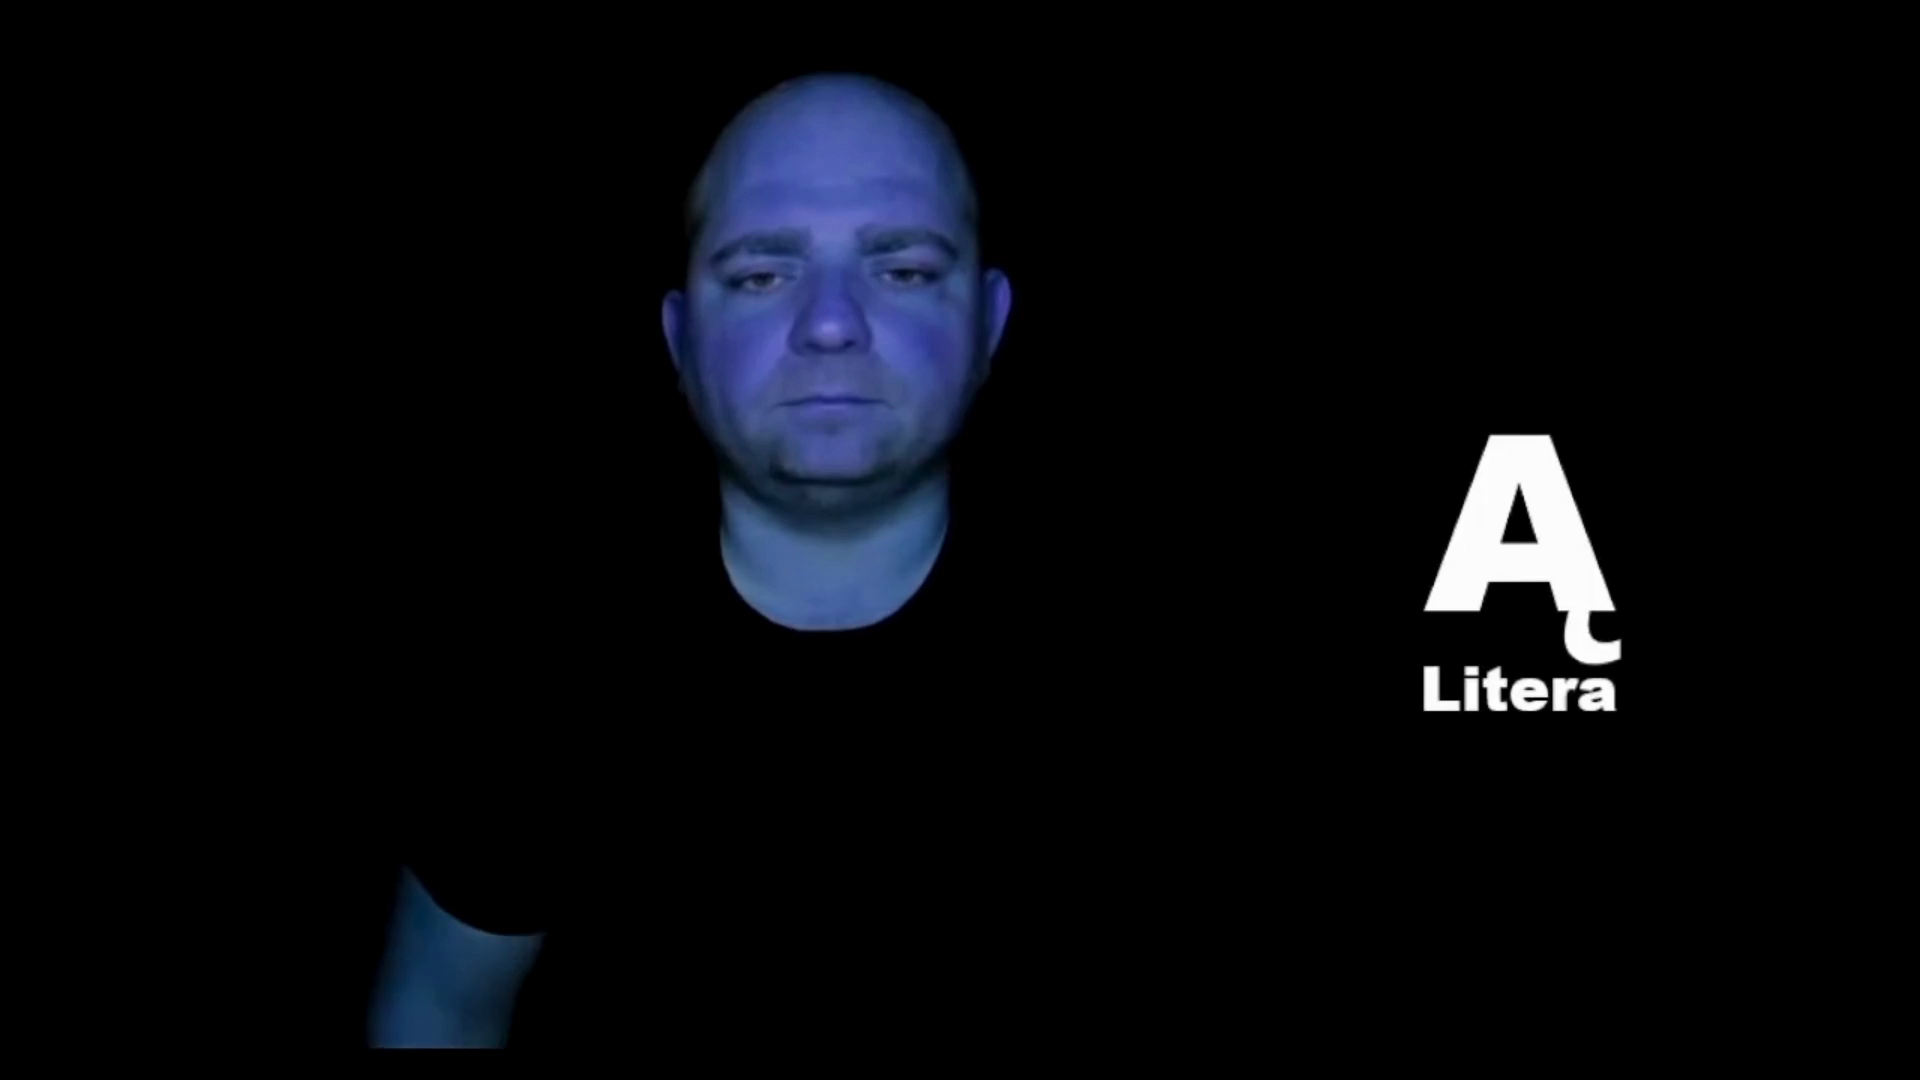

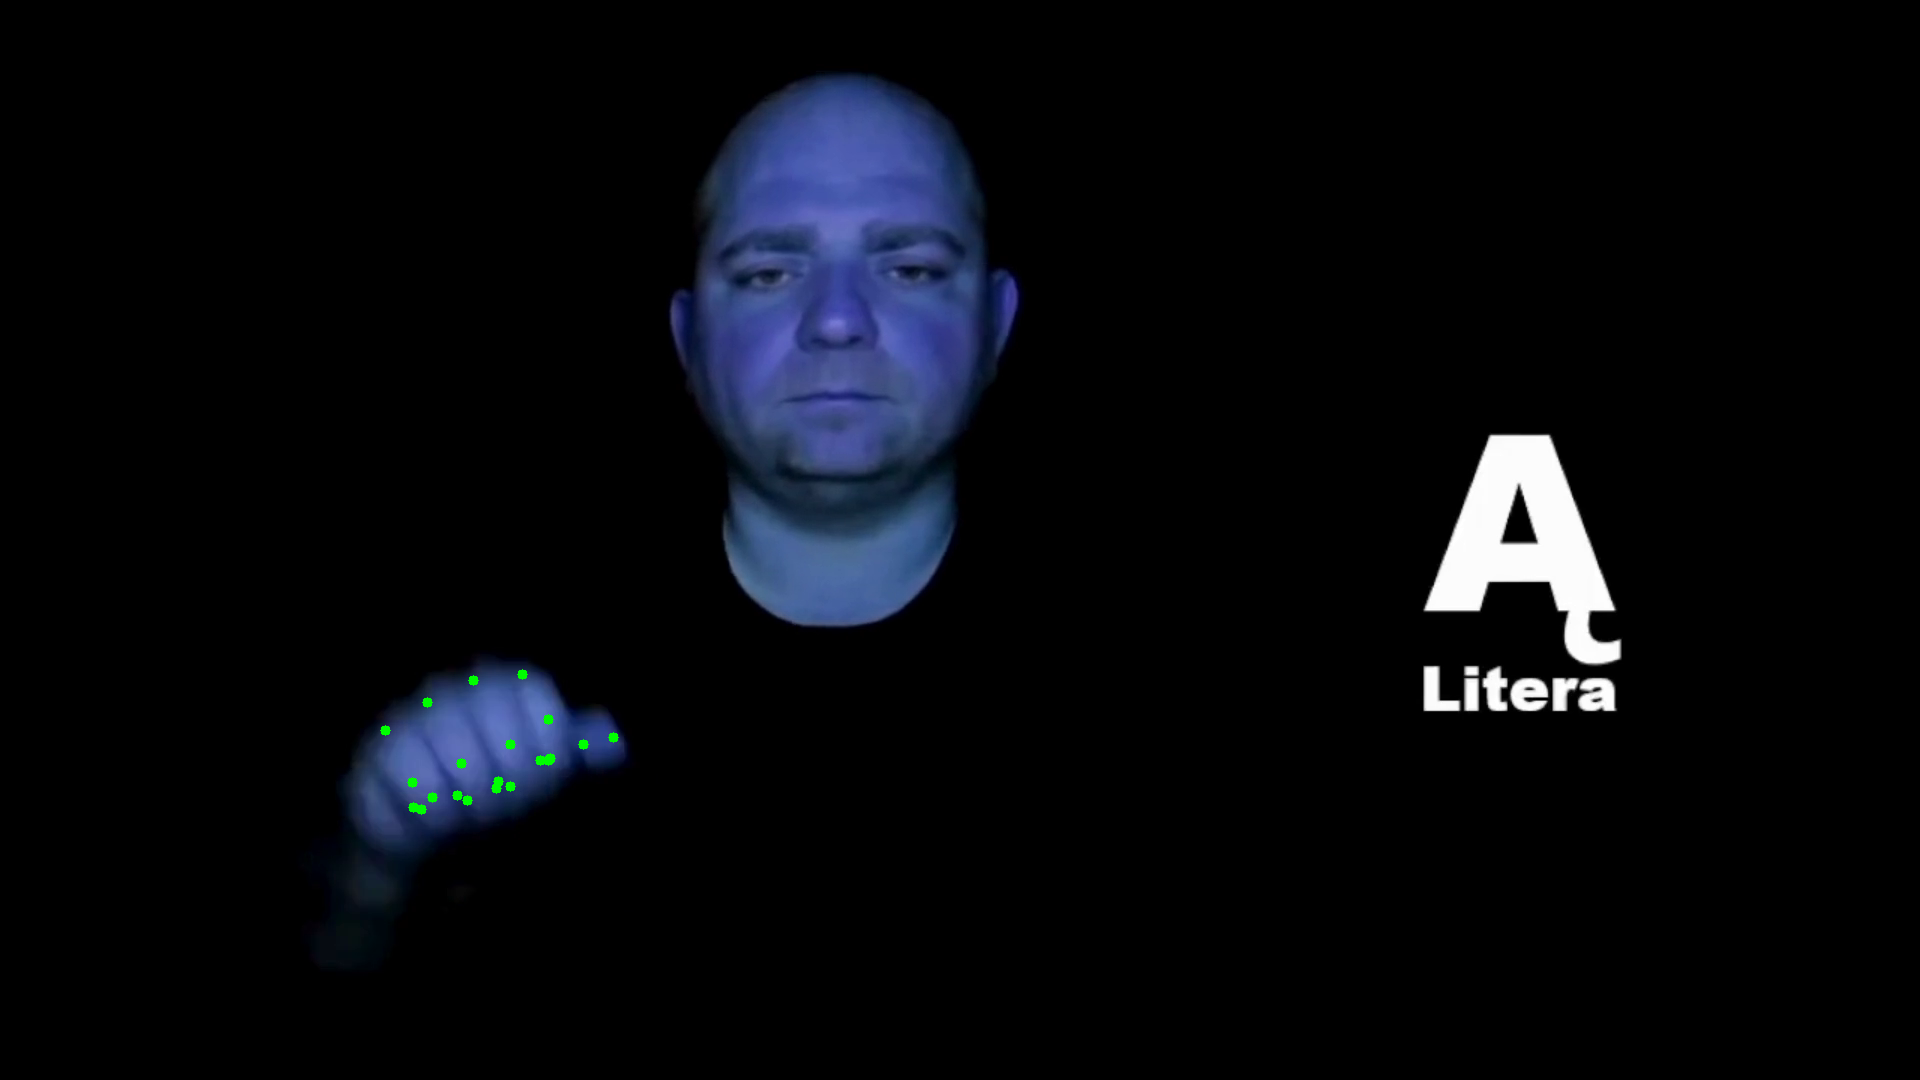

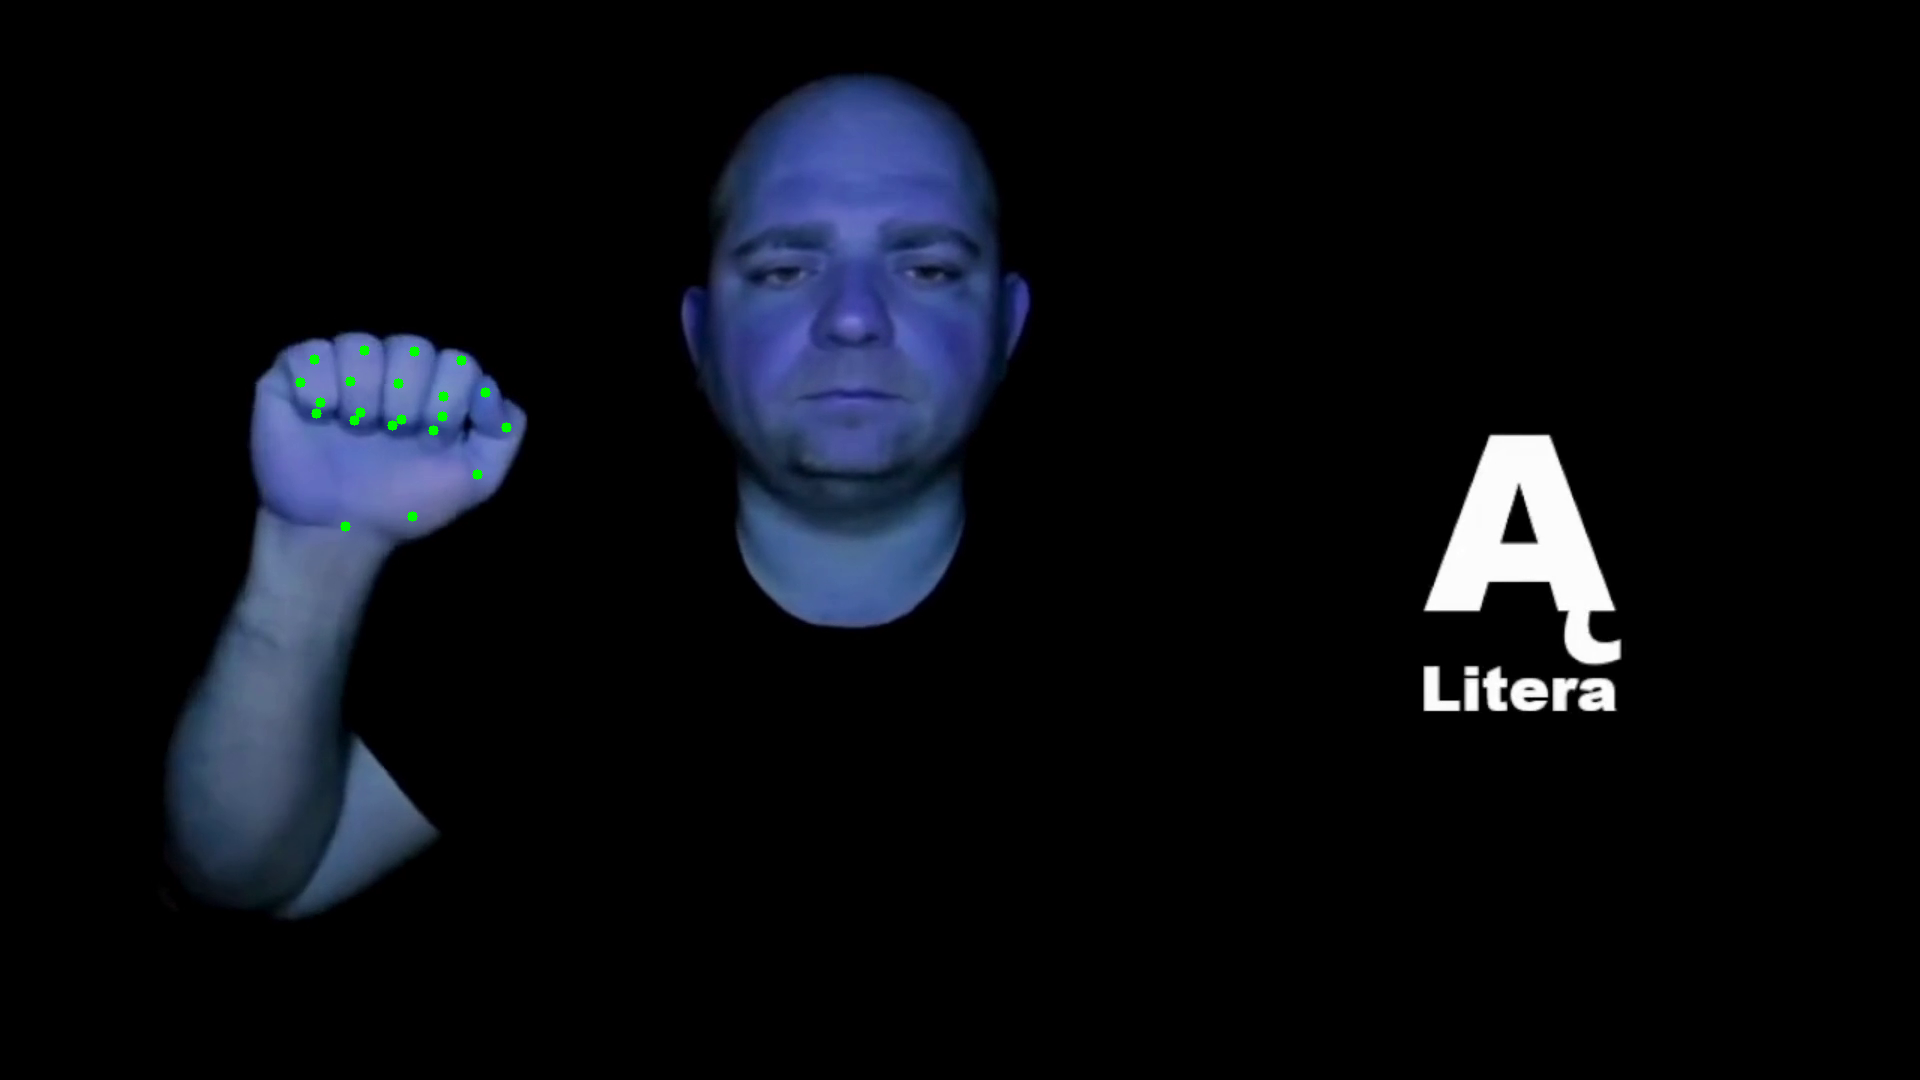

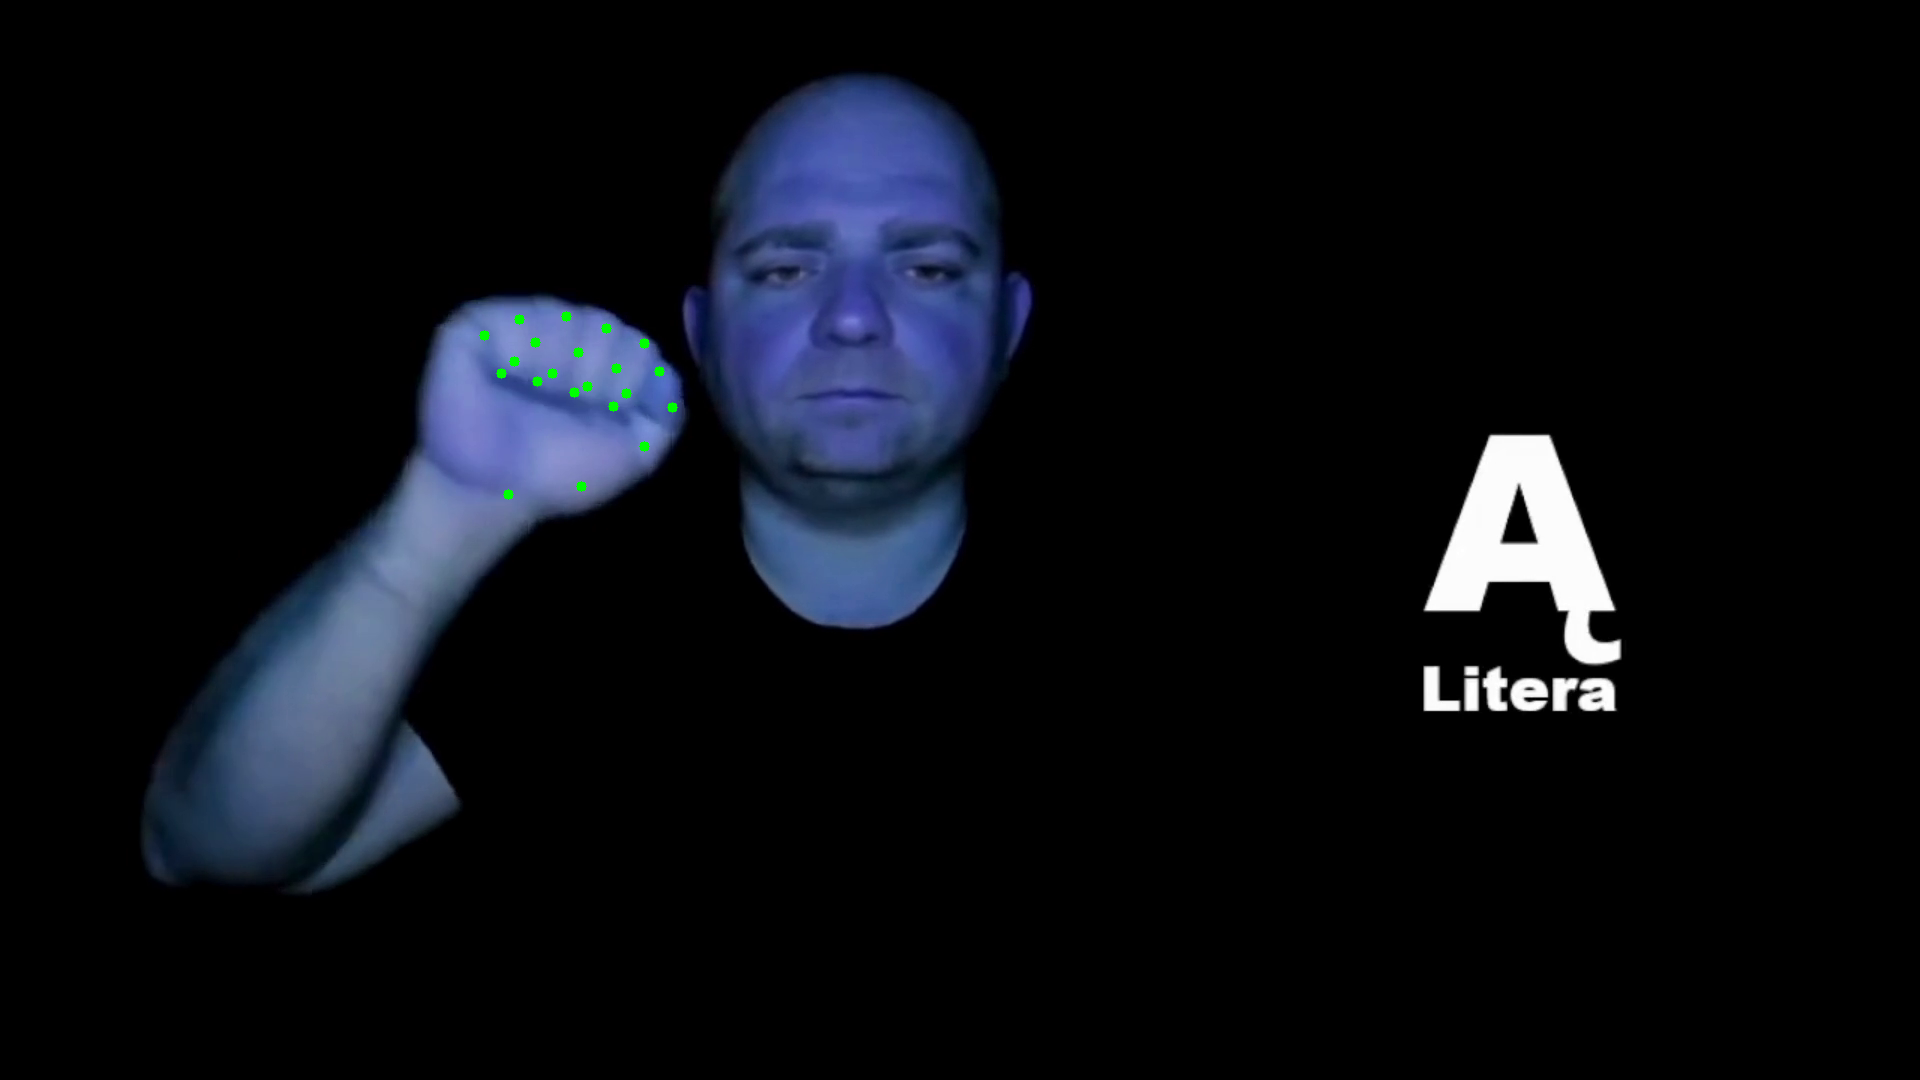

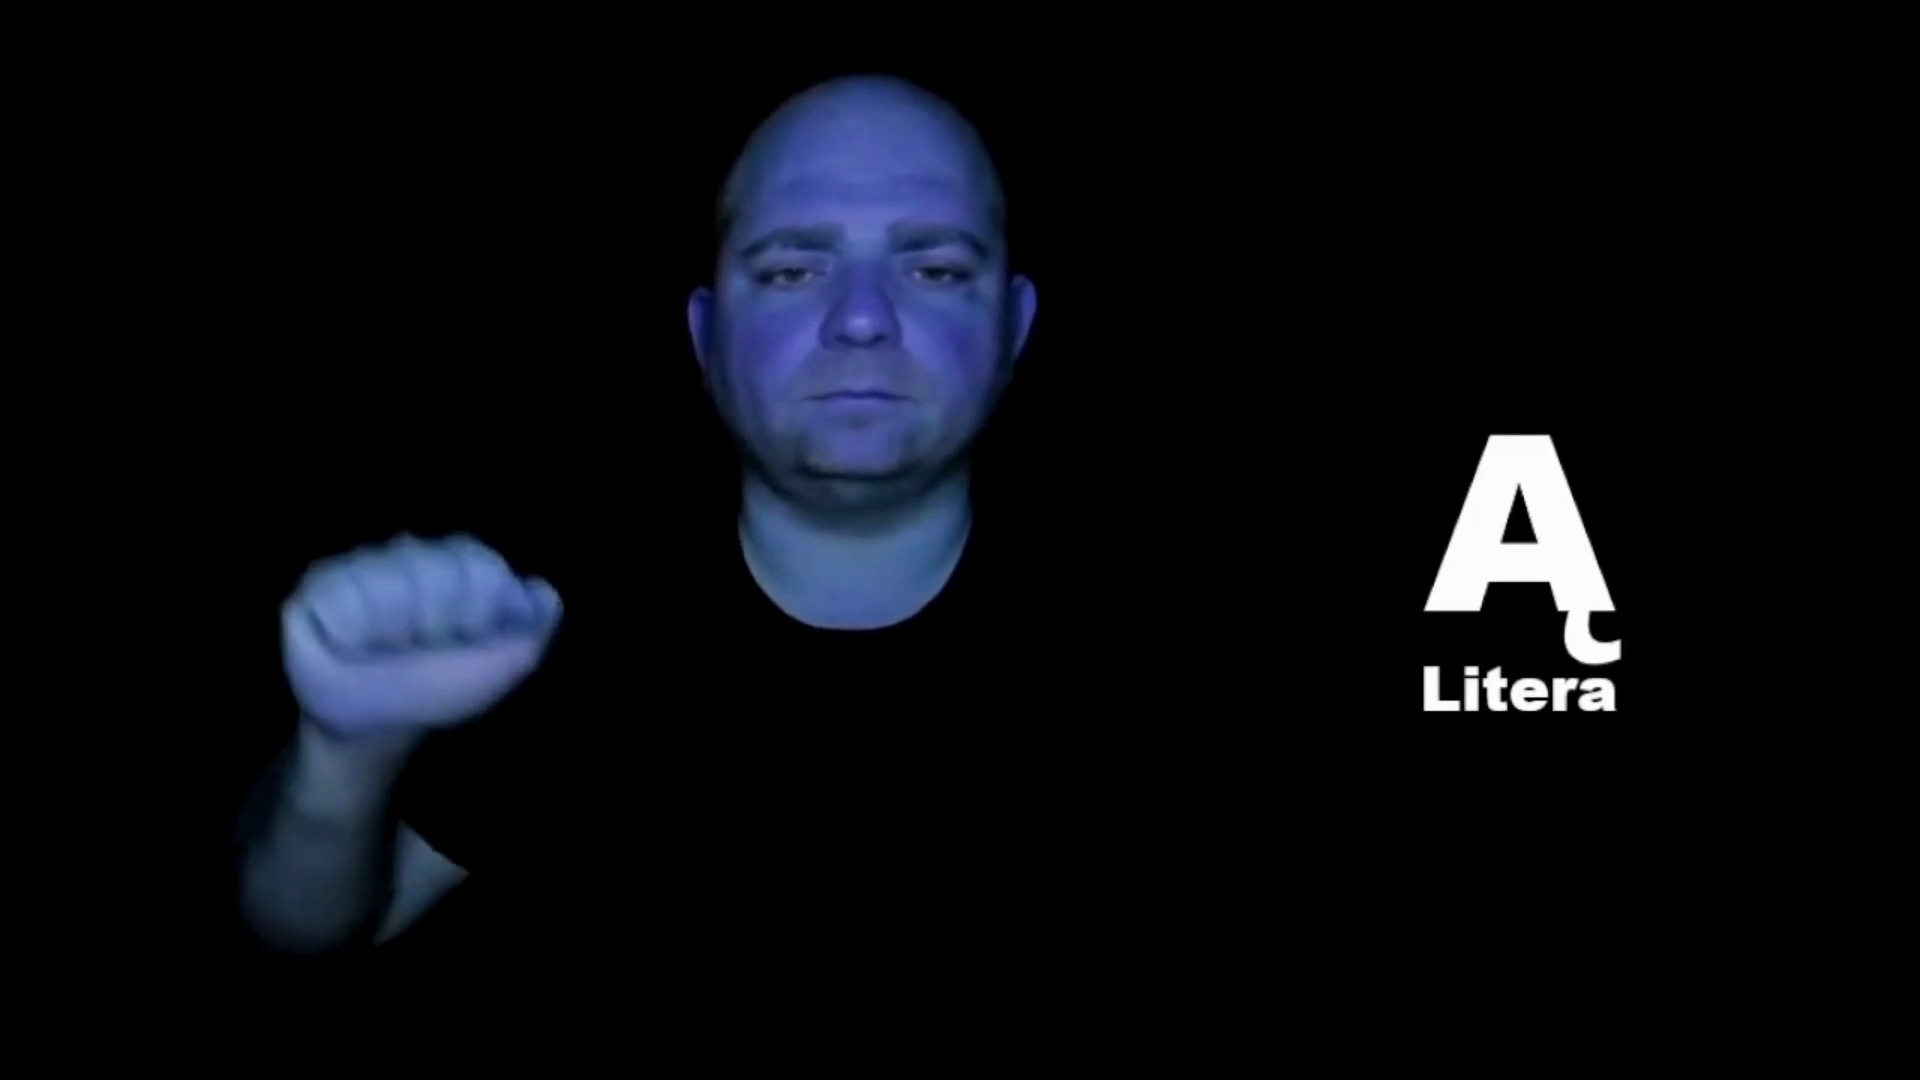

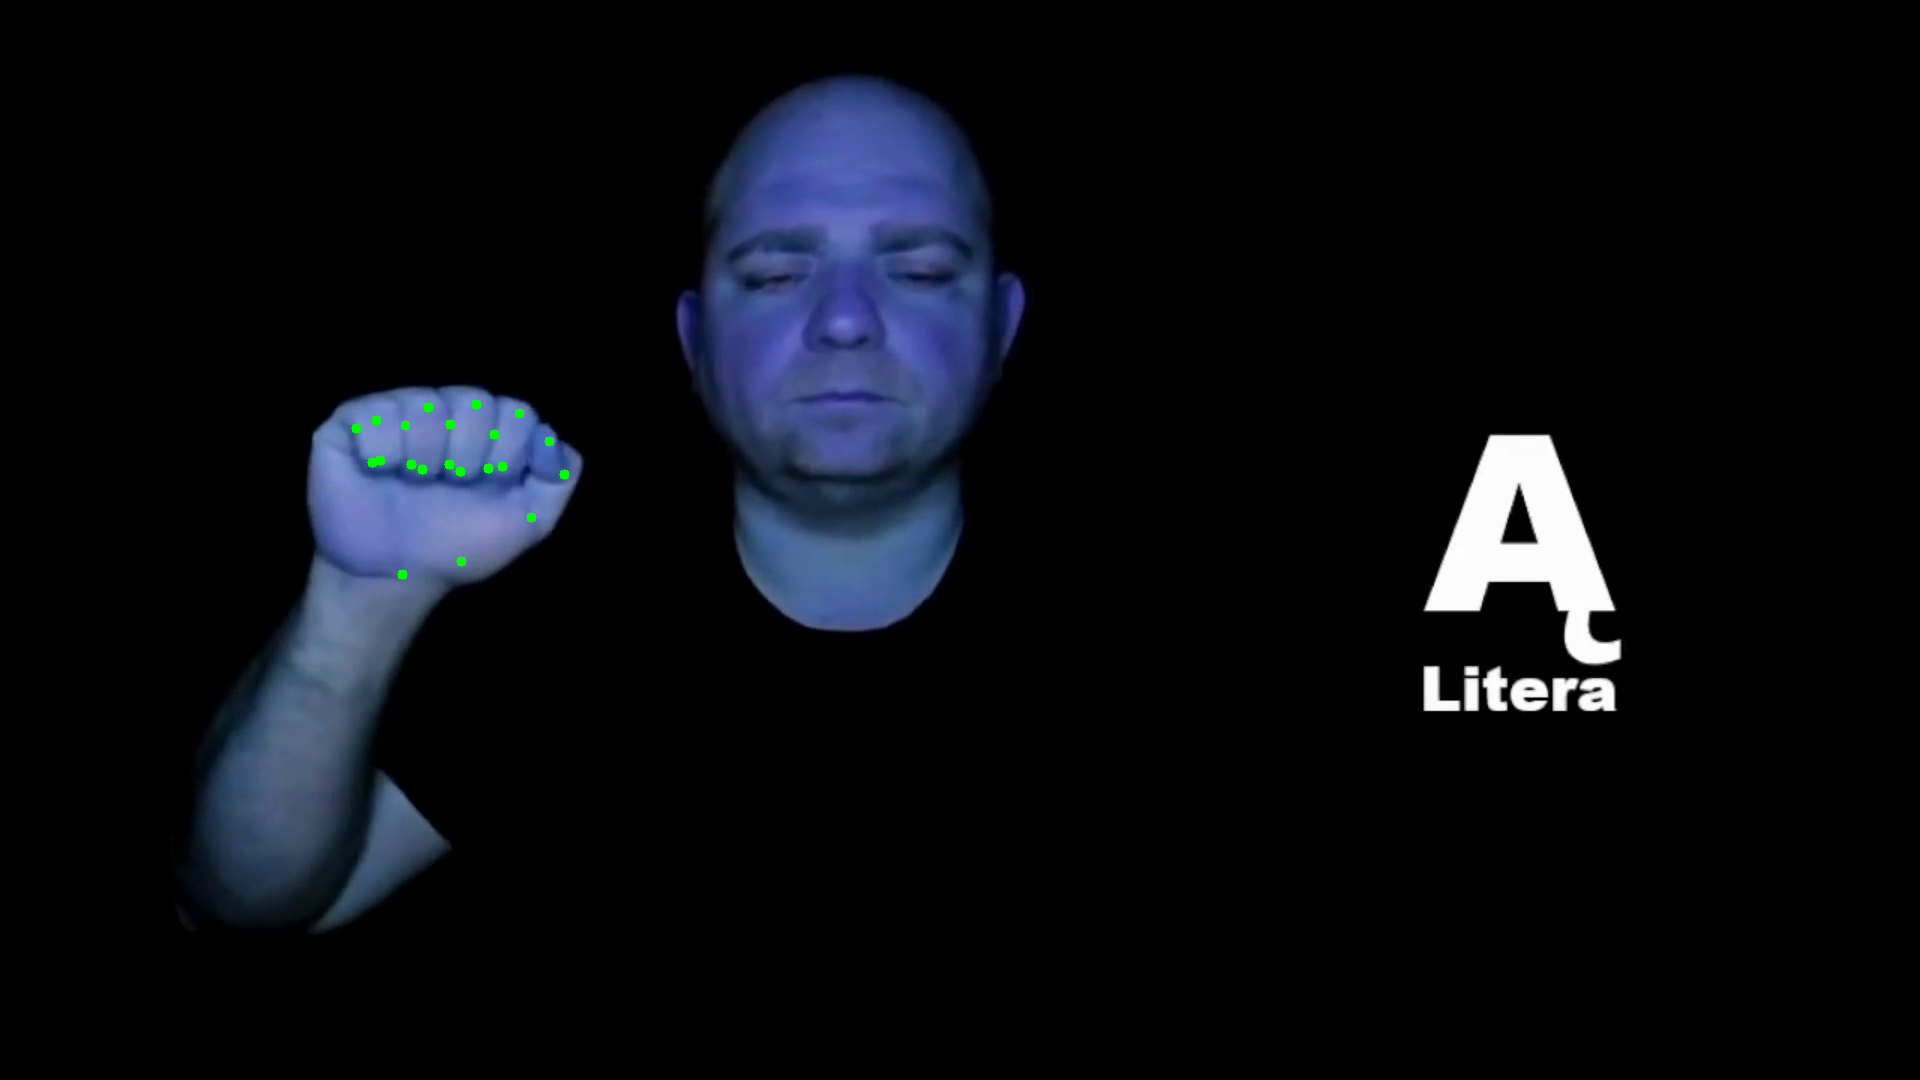

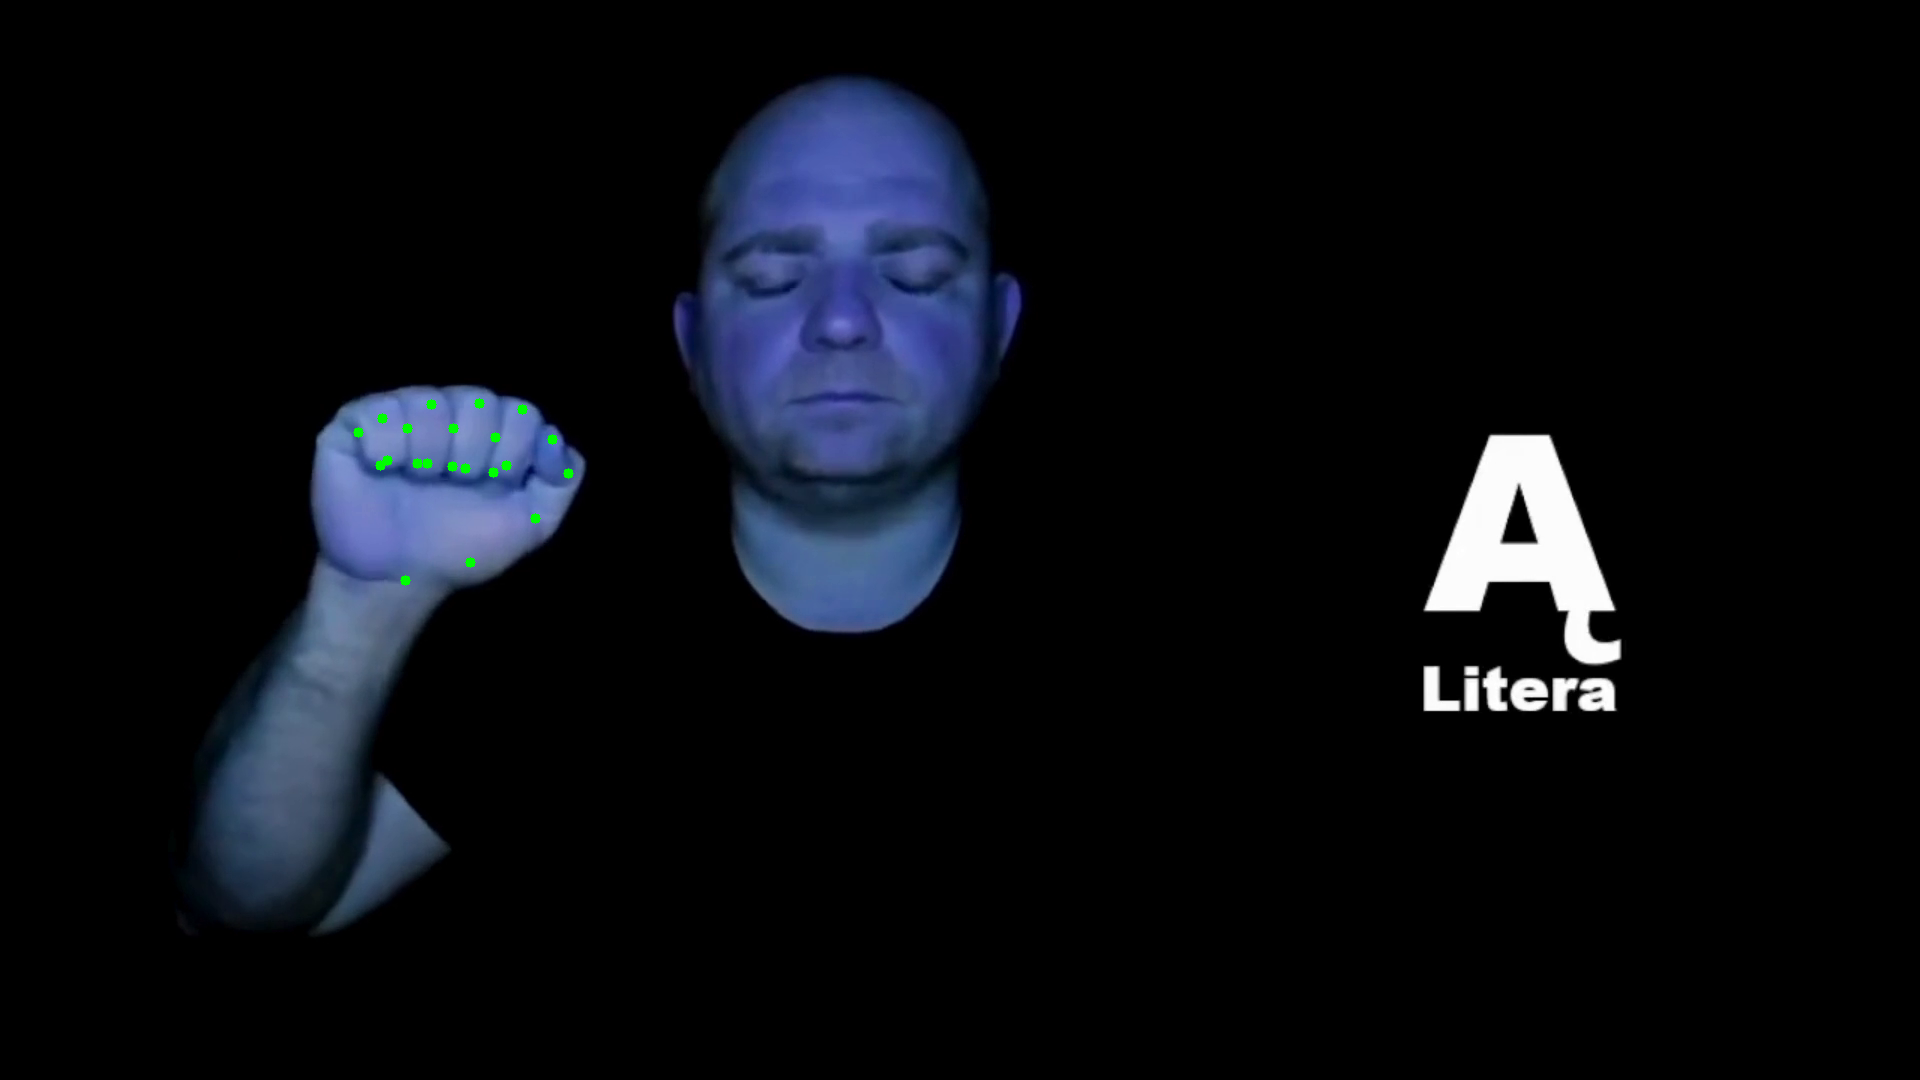

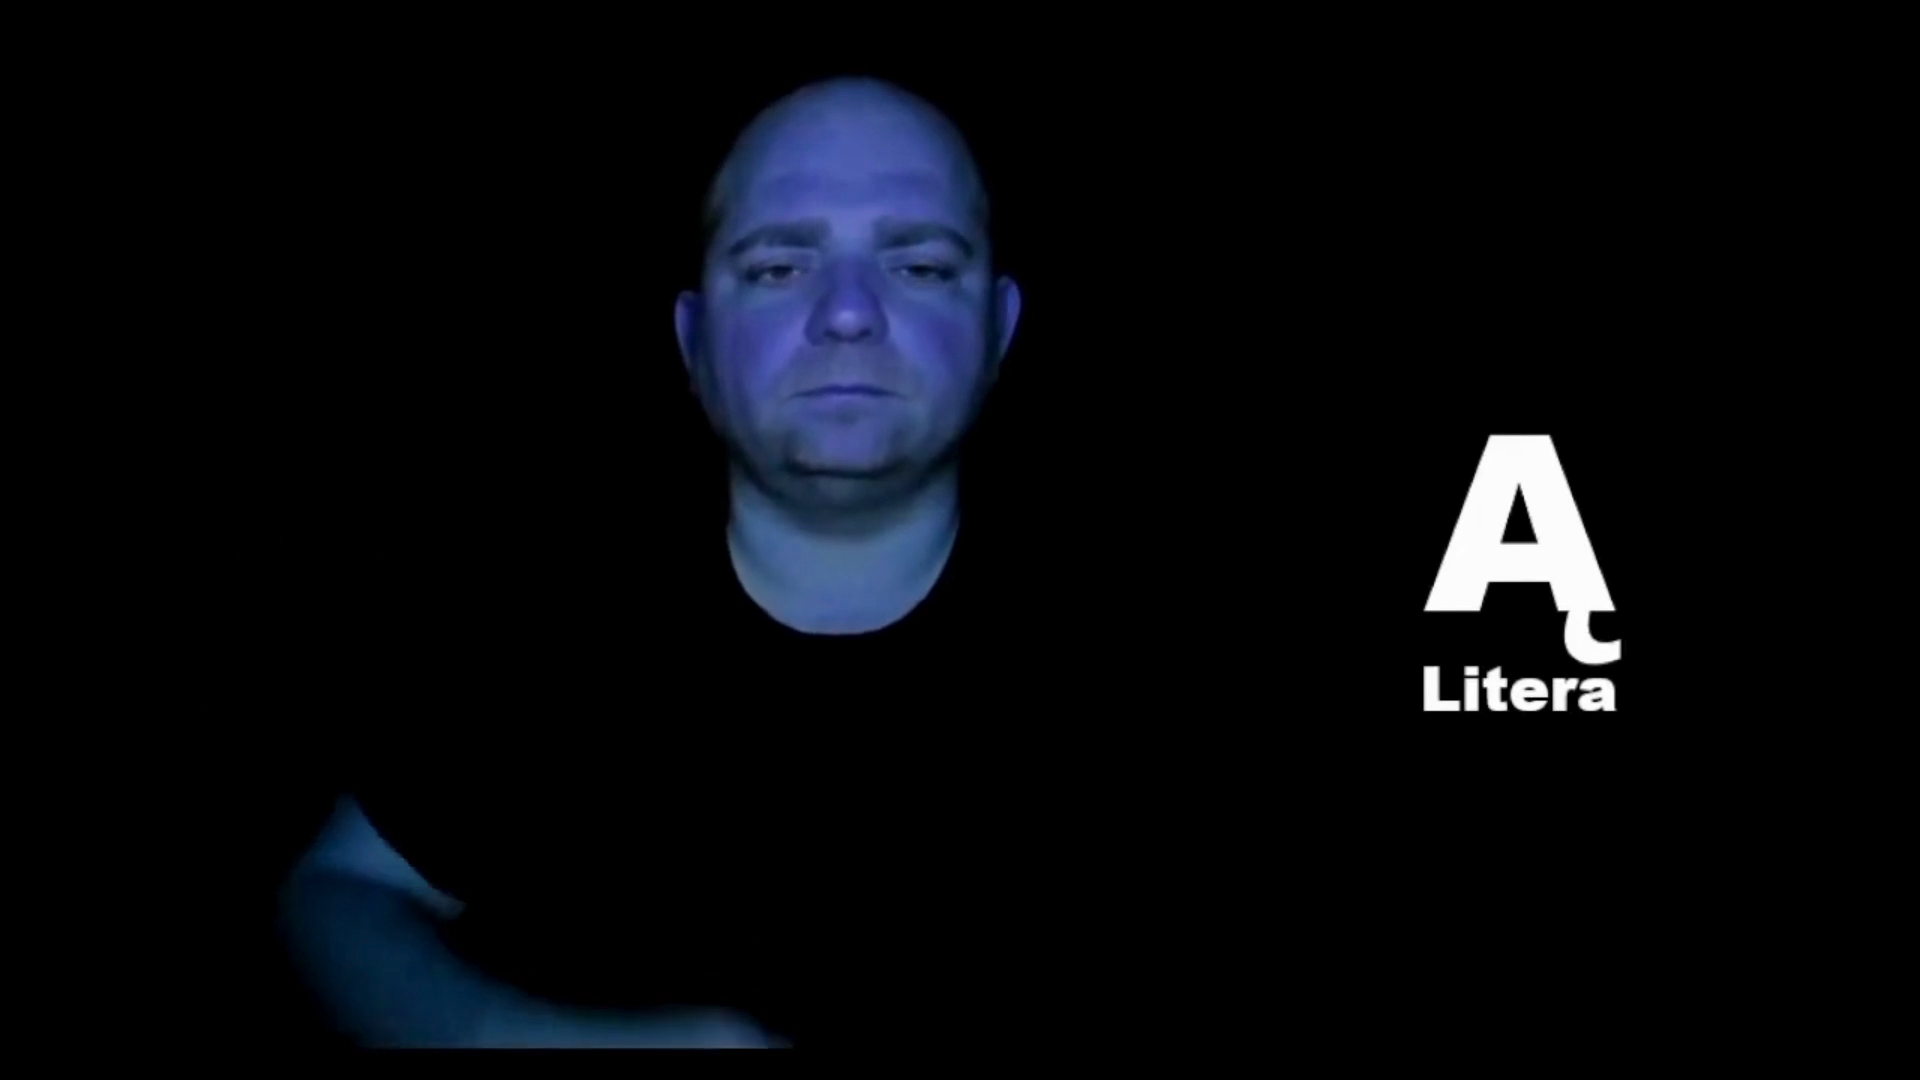

In [9]:
import time


def draw_landmarks(frame, landmarks):
    for landmark in landmarks.values():
        x, y = int(landmark["x"] * frame.shape[1]), int(landmark["y"] * frame.shape[0])
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

def display_video_with_landmarks(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_rate = 0.5
    frames_to_skip = int(fps * frame_rate)

    current_frame = 0

    while cap.isOpened():
        # Set the position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0].landmark
            landmarks_data = {f"hand_landmark_{i}": {"x": landmark.x, "y": landmark.y} for i, landmark in enumerate(hand_landmarks)}
            draw_landmarks(frame, landmarks_data)

        # Convert the RGB image to PIL Image
        pil_image = Image.fromarray(frame)

        # Display the frame in VS Code
        display(pil_image)

        # Wait for 0.5 seconds before displaying the next frame
        time.sleep(0.5)

        current_frame += frames_to_skip

    cap.release()

video_path = "/home/ant/projects/psl/dataset/Videos/alphabet/Ą.mp4"
display_video_with_landmarks(video_path)   

_______________________KONIEC DODANEGO

In [ ]:
# init(autoreset=True)

def draw_landmarks(frame, landmarks):
    for landmark in landmarks.values():
        x, y = int(landmark["x"] * frame.shape[1]), int(landmark["y"] * frame.shape[0])
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

def display_video_with_landmarks(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_rate = 0.5
    frames_to_skip = int(fps * frame_rate)

    current_frame = 0

    while cap.isOpened():
        # Set the position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0].landmark
            landmarks_data = {f"hand_landmark_{i}": {"x": landmark.x, "y": landmark.y} for i, landmark in enumerate(hand_landmarks)}
            draw_landmarks(frame, landmarks_data)

        # Convert the RGB image to PIL Image
        pil_image = Image.fromarray(frame)

        # Display the frame in VS Code
        display(pil_image)

        current_frame += frames_to_skip

    cap.release()


if __name__ == "__main__":
    video_path = "/home/ant/projects/psl/dataset/Videos/alphabet/Ą.mp4"
    display_video_with_landmarks(video_path)

In [ ]:
# init(autoreset=True)

def draw_landmarks(frame, landmarks):
    for landmark in landmarks.values():
        x, y = int(landmark["x"] * frame.shape[1]), int(landmark["y"] * frame.shape[0])
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

def get_first_and_last(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    first, last = None, None

    current_frame = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        # print(results.multi_hand_landmarks is None, current_frame)
        if not first and results.multi_hand_landmarks:
            first = current_frame
            last = first
            # print('if', current_frame)
        elif first and results.multi_hand_landmarks:
            # print('here', current_frame)
            last = max(last, current_frame)
        current_frame += 1
    return first, last


def display_video_with_landmarks(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()
    first, last = get_first_and_last(video_path)
    print(first, last)
    cap = cv2.VideoCapture(video_path)
    # frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_count = last - first
    print(frame_count)
    k = 5
    frames = np.linspace(first, last, k+2).astype(int)[1:-1]
    # q25, q50, q75 = frame_count // 4, frame_count // 2, 3 * frame_count // 4
    # frames = [q25, q50, q75]
    # frames = [f + first for f in frames]
    print(frames)
    current = 0

    while cap.isOpened():
        # Set the position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frames[current])
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0].landmark
            landmarks_data = {f"hand_landmark_{i}": {"x": landmark.x, "y": landmark.y} for i, landmark in enumerate(hand_landmarks)}
            draw_landmarks(frame, landmarks_data)

        # Convert the RGB image to PIL Image
        pil_image = Image.fromarray(frame)

        # Display the frame in VS Code
        display(pil_image)

        current += 1
        if current + 1 > len(frames):
            break

    cap.release()


if __name__ == "__main__":
    video_path = "/home/ant/projects/psl/dataset/Videos/alphabet/B.mp4"
    display_video_with_landmarks(video_path)

In [2]:
# init(autoreset=True)
def get_first_and_last(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    first, last = None, None

    current_frame = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        # print(results.multi_hand_landmarks is None, current_frame)
        if not first and results.multi_hand_landmarks:
            first = current_frame
            last = first
            # print('if', current_frame)
        elif first and results.multi_hand_landmarks:
            # print('here', current_frame)
            last = max(last, current_frame)
        current_frame += 1
    return first, last


def value_imputation(x, mask):
    x = x.copy()
    l = -1
    for i, m in enumerate(mask):
        if m:
            l = i
        if not m:
            for r in range(i, len(mask)):
                if mask[r]:
                    break
            else:
                r = -1
            if l > -1 and r > -1:
                x[i] = (x[l] + x[r]) / 2
            elif l > -1 and r < 0:
                x[i] = x[l]
            elif l < 0 and r > -1:
                x[i] = x[r]
            else:
                raise ValueError('No landmarks found')
    return x

def video_with_landmarks(video_path):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()
    first, last = get_first_and_last(video_path)
    # print(first, last)
    cap = cv2.VideoCapture(video_path)
    # frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_count = last - first
    # print(frame_count)
    k = 5
    frames = np.linspace(first, last, k+2).astype(int)[1:-1]
    # q25, q50, q75 = frame_count // 4, frame_count // 2, 3 * frame_count // 4
    # frames = [q25, q50, q75]
    # frames = [f + first for f in frames]
    # print(frames)
    current = 0
    landmarks_data = []
    mask = [True]*k
    while cap.isOpened():
        # Set the position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frames[current])
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and get landmarks
        results = hands.process(rgb_frame)
        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0].landmark
            landmarks_data.append([[landmark.x, landmark.y, landmark.z] for landmark in hand_landmarks])
        else:
            landmarks_data.append([[0, 0, 0]] * 21)
            mask[current] = False
        current += 1
        if current + 1 > len(frames):
            break
    
    cap.release()
    landmarks_data = np.array(landmarks_data)
    landmarks_data = value_imputation(landmarks_data, mask).flatten()
    # print(landmarks_data.shape)
    return landmarks_data



In [36]:
video_path = "/home/ant/projects/psl/dataset/Videos/alphabet/A.mp4"
landmarks_data = video_with_landmarks(video_path)

In [3]:
videos_path = "/home/ant/projects/psl/dataset/Videos/alphabet"
labels = []
landmarks = []
for i, filename in enumerate(tqdm(os.listdir(videos_path))):
    if filename.endswith('.mp4'):
        video_path = os.path.join(videos_path, filename)
        # print(video_path)
        label = filename.split('.')[0]
        labels.append(label)
        land = video_with_landmarks(video_path)
        landmarks.append(land)
    if i > 2:
        break

landmarks = np.array(landmarks)
labels = np.array(labels)
        

  0%|          | 0/35 [00:00<?, ?it/s]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
  9%|▊         | 3/35 [00:17<03:03,  5.73s/it]


In [4]:
def preprocess_data(labels_folder):
    labeled_with_landmarks_count = 0
    labeled_without_landmarks_count = 0
    data_rows = []
    labels = []

    for filename in tqdm(os.listdir(labels_folder)):
        if filename.endswith('.json'):
            with open(os.path.join(labels_folder, filename), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                if 'hand_landmarks' in data:
                    labeled_with_landmarks_count += 1

                    landmarks_data = data['hand_landmarks']
                    row = []
                    
                    for landmark_key in landmarks_data:
                        landmark = landmarks_data[landmark_key]
                        row.extend([landmark['x'], landmark['y'], landmark['z']])
                    
                    data_rows.append(row)

                    labels.append(data['label'])

                else:
                    labeled_without_landmarks_count += 1

    return data_rows, labels

In [5]:
labels_folder = '../dataset/labels'
data_static, labels_static = preprocess_data(labels_folder)
data_static = np.array(data_static)
labels_static = np.array(labels_static)

100%|██████████| 3626/3626 [00:00<00:00, 21577.95it/s]


In [11]:
data_static = np.repeat(data_static, repeats=5, axis=1)

In [12]:
X = np.concatenate([landmarks, data_static], axis=0)
y = np.concatenate([labels, labels_static], axis=0)
X.shape, y.shape

((3266, 315), (3266,))

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y)

# Evaluate the model
accuracy = rf.score(X, y)
print(f"Accuracy of the RandomForestClassifier: {accuracy}")

Accuracy of the RandomForestClassifier: 1.0
